In [1]:
# Tutorial 1

import pandas as pd
import numpy as np



In [2]:
pd.set_option('display.max_rows', None) 
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\fuel.csv')  
dataset.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,NaN,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,NaN,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,NaN,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,NaN,9.5,11.0,258
3,NaN,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,NaN,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [3]:
dataset.shape

(1046, 12)

In [4]:
dataset.dropna(axis=1, thresh = 700, inplace = True)
dataset.shape

(1046, 11)

In [5]:
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [6]:
num_cols = dataset.select_dtypes(exclude=['object']).columns.tolist() #get the columns with the numerical data
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist() #get the columns with the categorical data

In [7]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
     
)


cat_pipeline = make_pipeline(
    SimpleImputer(missing_values = np.nan, strategy='most_frequent'),
    OneHotEncoder(drop = 'if_binary', max_categories = 4, handle_unknown='ignore',sparse=False)
)

In [8]:
combined_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
], remainder = 'passthrough')

In [9]:
transformed_dataset = combined_pipeline.fit_transform(dataset) 

c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
feature_names = combined_pipeline.get_feature_names_out() 

In [11]:
pd.set_option('display.max_columns', None) 
final_dataset = pd.DataFrame(transformed_dataset, columns = feature_names)
final_dataset.head()

,num__Engine-Size,num__Cylinders,num__Fuel-Consumption-City,num__Fuel-Consumption-Hwy,num__Fuel-Consumption-Comb,num__CO2-Emissions,cat__Make_Chevrolet,cat__Make_Ford,cat__Make_Mercedes-Benz,cat__Make_infrequent_sklearn,cat__Model_Sierra 4WD,cat__Model_Silverado,cat__Model_Silverado 4WD,cat__Model_infrequent_sklearn,cat__Vehicle-Class_Mid-size,cat__Vehicle-Class_SUV: Small,cat__Vehicle-Class_SUV: Standard,cat__Vehicle-Class_infrequent_sklearn,cat__Transmission_AS6,cat__Transmission_AS8,cat__Transmission_M6,cat__Transmission_infrequent_sklearn,cat__Fuel-Type_E,cat__Fuel-Type_X,cat__Fuel-Type_Z,cat__Fuel-Type_infrequent_sklearn
0,2.4,4.0,9.9,7.0,8.6,199.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3.5,6.0,12.2,9.0,10.8,252.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3.5,6.0,12.0,9.5,11.0,258.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3.0,6.0,9.1,9.0,9.0,210.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.5,6.0,11.1,10.8,11.0,261.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
X = final_dataset[['num__Fuel-Consumption-City', 'cat__Vehicle-Class_Mid-size']]

In [13]:
corr = X.corr(method='pearson')
corr.round(2)

,num__Fuel-Consumption-City,cat__Vehicle-Class_Mid-size
num__Fuel-Consumption-City,1.00,-0.23
cat__Vehicle-Class_Mid-size,-0.23,1.00


Text(0.5, 1.0, 'Correlation Matrix')

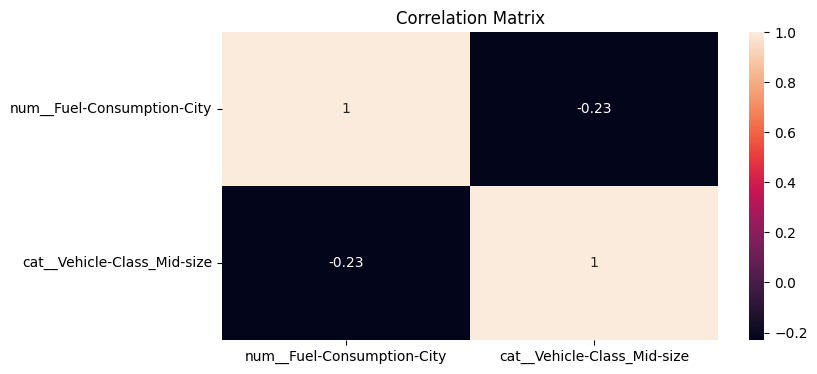

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

sns.heatmap(corr, annot=True)


plt.title('Correlation Matrix')

In [15]:
X = final_dataset[['num__Fuel-Consumption-City', 'cat__Vehicle-Class_Mid-size']]
y = final_dataset['num__CO2-Emissions']

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [18]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  49.89456553632078
Coefficient:  [16.32922232 -3.61502936]


In [19]:
y_pred_model= model.predict(X_test)

In [20]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
399,329.0,307.896278
329,296.0,275.237834
124,204.0,203.389255
678,178.0,187.060033
216,314.0,306.263356


In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.8480555676545569


In [57]:
#Tutorial 2
X1 = final_dataset[['num__Fuel-Consumption-City', 'cat__Vehicle-Class_Mid-size', 'num__Fuel-Consumption-Hwy']]
y = final_dataset['num__CO2-Emissions']

In [58]:
corr = X1.corr(method='pearson')
corr.round(2)

,num__Fuel-Consumption-City,cat__Vehicle-Class_Mid-size,num__Fuel-Consumption-Hwy
num__Fuel-Consumption-City,1.00,-0.23,0.94
cat__Vehicle-Class_Mid-size,-0.23,1.00,-0.27
num__Fuel-Consumption-Hwy,0.94,-0.27,1.00


Text(0.5, 1.0, 'Correlation Matrix')

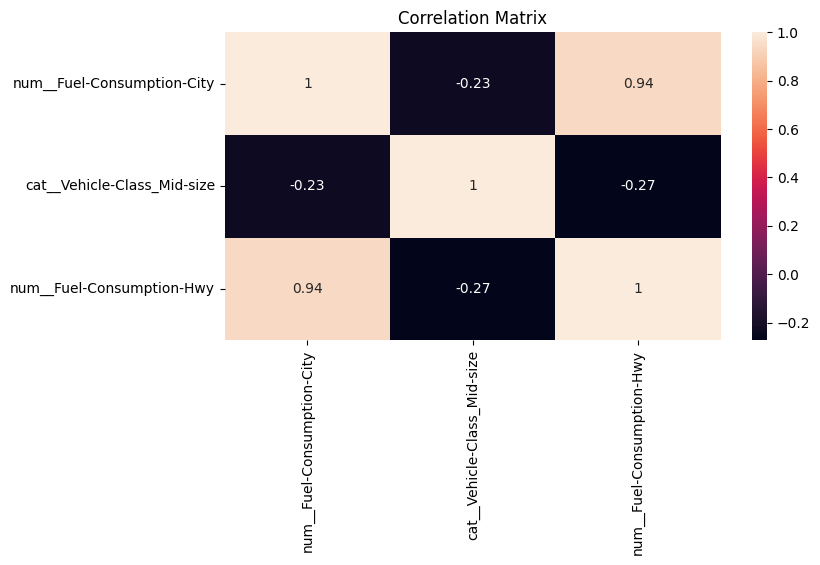

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

sns.heatmap(corr, annot=True)


plt.title('Correlation Matrix')

In [60]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


lasso = Lasso(alpha=0.1)  


lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [61]:
print("Intercept: ", lasso.intercept_)
print("Coefficient: ", lasso.coef_)

Intercept:  37.42611716885486
Coefficient:  [11.2418821  -0.2632706   8.26223639]


In [62]:
y_pred = lasso.predict(X_test)

In [63]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
model_diff.head()

,Actual value,Predicted value
773,175.0,183.910016
280,221.0,222.985923
629,226.0,227.943265
318,277.0,268.969584
1008,244.0,243.383935


In [64]:
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.8761986640423267


In [68]:
# Tutorial 3

X = final_dataset.drop("num__CO2-Emissions", axis=1).values
y = final_dataset["num__CO2-Emissions"].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [70]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


kf=KFold(n_splits=5,shuffle=True, random_state=42)


lasso = Lasso()


lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf, scoring= 'neg_mean_absolute_error')
lasso_cv.fit(X, y)

print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 0.05}


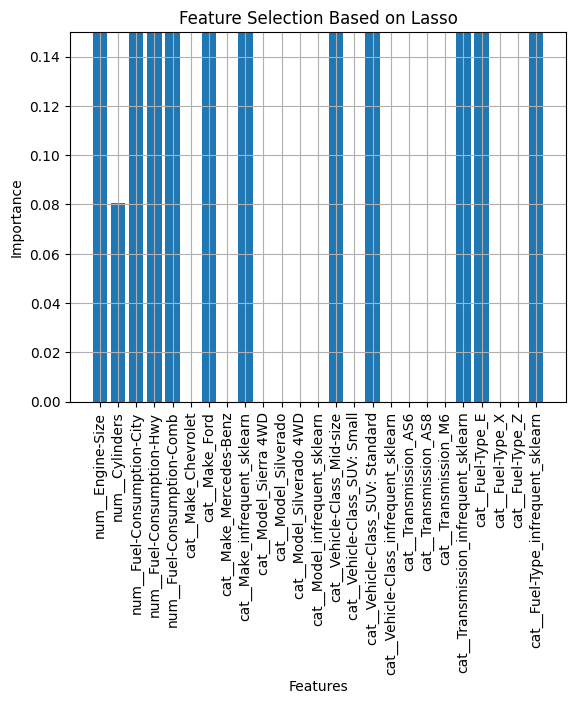

In [71]:

lasso1 = Lasso(alpha=0.05)
lasso1.fit(X_train, y_train)

  
lasso1_coef = np.abs(lasso1.coef_)


plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [73]:
feature_subset=np.array(names)[lasso1_coef>0.05]
feature_subset

array(['num__Engine-Size', 'num__Cylinders', 'num__Fuel-Consumption-City',
       'num__Fuel-Consumption-Hwy', 'num__Fuel-Consumption-Comb',
       'cat__Make_Ford', 'cat__Make_infrequent_sklearn',
       'cat__Vehicle-Class_Mid-size', 'cat__Vehicle-Class_SUV: Standard',
       'cat__Transmission_infrequent_sklearn', 'cat__Fuel-Type_E',
       'cat__Fuel-Type_infrequent_sklearn'], dtype=object)

In [74]:
feature_subset1=np.append(feature_subset, "num__CO2-Emissions")
feature_subset1

array(['num__Engine-Size', 'num__Cylinders', 'num__Fuel-Consumption-City',
       'num__Fuel-Consumption-Hwy', 'num__Fuel-Consumption-Comb',
       'cat__Make_Ford', 'cat__Make_infrequent_sklearn',
       'cat__Vehicle-Class_Mid-size', 'cat__Vehicle-Class_SUV: Standard',
       'cat__Transmission_infrequent_sklearn', 'cat__Fuel-Type_E',
       'cat__Fuel-Type_infrequent_sklearn', 'num__CO2-Emissions'],
      dtype=object)

In [76]:
new_df = final_dataset[['num__Engine-Size', 'num__Cylinders', 'num__Fuel-Consumption-City',
 'num__Fuel-Consumption-Hwy', 'num__Fuel-Consumption-Comb', 'cat__Make_Ford',
 'cat__Make_infrequent_sklearn', 'cat__Vehicle-Class_Mid-size',
 'cat__Vehicle-Class_SUV: Standard', 'cat__Transmission_infrequent_sklearn',
 'cat__Fuel-Type_E', 'cat__Fuel-Type_infrequent_sklearn',
 'num__CO2-Emissions']]

In [77]:
new_df.shape

(1046, 13)

In [45]:
X = new_df.drop(['num__CO2-Emissions'], axis =1)
y = new_df['num__CO2-Emissions']

In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [49]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [50]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)


Intercept:  0.05899196337037438
Coefficient:  [   1.7503409    -0.216011      4.88075575    6.92585551   11.84407069
    0.47296486   -0.76163866    0.79259974   -1.47411266   -1.58973258
 -110.74501207   30.76049461]


In [51]:
y_pred_model= model.predict(X_test)

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.9955832866886161


In [53]:
print("Train Accuracy:",model.score(X_train, y_train))

Train Accuracy: 0.9906975710320831


In [54]:
print("Test Accuracy:",model.score(X_test, y_test))

Test Accuracy: 0.9955832866886161
